In [2]:
%cd ..

/home/bhkuser/bhklab/katy/recist-vs-reality


In [3]:
import pandas as pd
from damply import dirs
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
data_dir = dirs.RESULTS / "medsam2-inference" / "RADCURE_GTVp_oral_cavity"

gt_measurements = pd.read_csv(data_dir / "mask_measurements_ground_truth.csv", index_col=0)
pred_measurements = pd.read_csv(data_dir / "mask_measurements_predicted.csv", index_col=0)

In [5]:
gt_measurements['PatientID'] = gt_measurements.index.str.split('/').str[5]
gt_measurements

,Short_Axis_Length,Number_of_Voxels,Actual_Volume (mm^3),PatientID
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-0005_0000/RTSTRUCT_04207053/ROI__[GTVp].nii.gz,30.271894,18609,35493.816046,RADCURE-0005_0000
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-0006_0001/RTSTRUCT_97032605/ROI__[GTVp].nii.gz,7.753296,1332,2119.648989,RADCURE-0006_0001
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-0007_0002/RTSTRUCT_66751618/ROI__[GTVp].nii.gz,23.291478,12694,24184.000032,RADCURE-0007_0002
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-0010_0004/RTSTRUCT_03495652/ROI__[GTVp].nii.gz,32.478578,24230,46215.012241,RADCURE-0010_0004
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-0011_0005/RTSTRUCT_45481664/ROI__[GTVp].nii.gz,8.284436,1298,2475.736108,RADCURE-0011_0005
...,...,...,...,...
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-4125_3331/RTSTRUCT_24118720/ROI__[GTVp].nii.gz,6.457366,1359,2592.084261,RADCURE-4125_3331
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-4126_3332/RTSTRUCT_21329231/ROI__[GTVp].nii.gz,24.735383,9082,17322.523367,RADCURE-4126_3332
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-4127_3333/RTSTRUCT_24615540/ROI__[GTVp].nii.gz,18.437476,7106,13538.010416,RADCURE-4127_3333
data/procdata/TCIA_RADCURE/images/mit_RADCURE_GTVp/RADCURE-4128_3334/RTSTRUCT_97949611/ROI__[GTVp].nii.gz,20.039321,13347,25457.357341,RADCURE-4128_3334


In [6]:
gt_opc = gt_measurements[gt_measurements['PatientID'].isin(pred_measurements.index)]
gt_opc = gt_opc.set_index('PatientID').sort_index()
gt_opc

,Short_Axis_Length,Number_of_Voxels,Actual_Volume (mm^3)
PatientID,,,
RADCURE-0014_0008,33.816053,58384,111358.533829
RADCURE-0040_0030,7.892610,5208,9922.031839
RADCURE-0067_0053,19.605785,16541,31549.422925
RADCURE-0115_0091,18.891312,14442,27545.902055
RADCURE-0137_0108,11.053642,8735,16660.674037
...,...,...,...
RADCURE-3458_2790,44.567158,123223,213151.148679
RADCURE-3697_3007,52.324576,129825,247336.363959
RADCURE-3740_3041,21.960005,10114,19268.707761


In [7]:
pred_measurements

,Short_Axis_Length,Number_of_Voxels,Actual_Volume (mm^3)
RADCURE-0014_0008,31.637984,54422,103801.625926
RADCURE-0040_0030,10.990991,7081,13490.381615
RADCURE-0067_0053,16.150577,9598,18306.714300
RADCURE-0115_0091,17.056881,12312,23483.253434
RADCURE-0137_0108,9.932689,7742,14766.678695
...,...,...,...
RADCURE-3458_2790,50.322294,127824,221109.958601
RADCURE-3697_3007,48.159364,121334,231159.717963
RADCURE-3740_3041,19.583201,9328,17771.258255
RADCURE-3746_3047,34.858952,53619,102152.347384


In [8]:
gt_opc.to_csv(data_dir / "mask_measurements_ground_truth_opc.csv", index_label = "PatientID")

In [9]:
pred_measurements.corrwith(gt_opc)

Short_Axis_Length       0.932822
Number_of_Voxels        0.973491
Actual_Volume (mm^3)    0.971475
dtype: float64

In [10]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

vol_regr = LinearRegression()
vol_regr_res = vol_regr.fit(gt_opc[['Actual_Volume (mm^3)']], pred_measurements[['Actual_Volume (mm^3)']])
vol_fit = vol_regr_res.predict(gt_opc[['Actual_Volume (mm^3)']])

fig = go.Figure(data=go.Scatter(x=gt_opc['Actual_Volume (mm^3)'], y=pred_measurements['Actual_Volume (mm^3)'], 
                                mode='markers',
                                marker=dict(color='Red', size=7, line_width=1),
                                ),
                layout=go.Layout(xaxis=dict(range=[0,140000],title='Ground Truth Volume (cubic mm)'),
                                 yaxis=dict(range=[0,140000],title='Predicted Volume (cubic mm)'),
                                 ))

fig.add_trace(go.Scatter(x=gt_opc['Actual_Volume (mm^3)'], y=vol_fit, mode='lines', line=dict(color='Blue'), name='Fit Line'))

fig.add_shape(type='line',
              x0=0, y0=0, x1=140000, y1=140000,
              line=dict(color='Grey',dash='dash'),
                xref='x', yref='y',
                layer='below'
                )

fig.update_layout(
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title={
        'text': 'Oral Cavity Squamous Cell Carcinoma',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20},
        'subtitle':{
            'text': 'MedSAM2 Segmentation Evaluation',
            'font': {'size': 12, 'color': 'grey'},
        }

    },
)
fig.show()

In [11]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter(x=gt_opc['Short_Axis_Length'], y=pred_measurements['Short_Axis_Length'], 
                                mode='markers',
                                marker=dict(size=8, color='Red', line_width=2)),
                layout=go.Layout(xaxis=dict(range=[0,60],title='Ground Truth Short Axis Length'),
                                 yaxis=dict(range=[0,60],title='Predicted Short Axis Length'),
                                 ))

fig.update_layout(
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title={
        'text': 'Oral Cavity Squamous Cell Carcinoma',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20},
        'subtitle':{
            'text': 'MedSAM2 Segmentation Results - Short Axis Length',
            'font': {'size': 12, 'color': 'grey'},
        }

    },
)
fig.show()

In [12]:
comparison_metrics = pd.read_csv(data_dir / "results.csv")
comparison_metrics.sort_values('Volume_Dice', ascending=False, ignore_index=True)

,ID,Volume_Dice,Added_Path_Length
0,RADCURE-1276_0917,0.922678,625
1,RADCURE-3268_2622,0.903890,1562
2,RADCURE-1825_1334,0.896778,5042
3,RADCURE-2906_2282,0.885157,744
4,RADCURE-1815_1326,0.882574,2215
...,...,...,...
92,RADCURE-0143_0111,0.500998,1847
93,RADCURE-0296_0233,0.490962,7718
94,RADCURE-1656_1197,0.469007,1079
95,RADCURE-2055_1525,0.349628,2972


In [13]:
from readii.image_processing import getROICenterCoords
import SimpleITK as sitk
import numpy as np

def displayCTSegOverlay(
    ctImage,
    segImage,
    sliceIdx=-1,
    cmapCT=plt.cm.Greys_r,
    ct_min=None,
    ct_max=None,
    cmapSeg=plt.cm.brg,
    alpha=0.3,
    savePath=None
) -> None:
    """Function to display a 2D slice from a CT with the ROI from a segmentation image overlaid in green
    Parameters
    ----------
    ctImage : sitk.Image or nd.array
        CT image to display a slice of. If an array, must have slices as first dimension.
    segImage : sitk.Image or nd.array
        Segmentation image containing a ROI to overlay with CT. Must be aligned to CT. If an array, must have slices as first dimension
        and have background labeled as 0s.
    sliceIdx : int
        Slice index from image to display. If not provided, will get center slice of ROI to plot.
    cmapCT : matplotlib.colormap
        Color map to use for CT plot, see https://matplotlib.org/stable/tutorials/colors/colormaps.html for options. Is greyscale by default.
    cmapSeg: matplotlib.colormap
        Color map to use for ROI plot, see https://matplotlib.org/stable/tutorials/colors/colormaps.html for options. Is green by default.
    alpha : float
        Value between 0 and 1 indicating transparency of ROI overtop of CT. Default is 0.3
    crop : bool
        Whether to crop the output image to the ROI in the segmentation.
    """
    # If slice index is not provided, get the center slice for the ROI in segImage
    if sliceIdx == -1:
        sliceIdx, _, _ = getROICenterCoords(segImage)

    # If image is a simple ITK image, convert to array for display
    if type(ctImage) == sitk.Image:
        ctImage = sitk.GetArrayFromImage(ctImage)
    # If segmentation is a simple ITK image, convert to array for display
    if type(segImage) == sitk.Image:
        segImage = sitk.GetArrayFromImage(segImage)

    # Make mask of ROI to ignore background in overlaid plot
    maskSeg = np.ma.masked_where(segImage == 0, segImage)

    if ct_min is None:
        ct_min = ctImage.min()
    if ct_max is None:
        ct_max = ctImage.max()

    # Plot slice of CT
    image_ax = plt.imshow(
        ctImage[sliceIdx, :, :], cmap=cmapCT, vmin=ct_min, vmax=ct_max
    )
    # Plot mask of ROI overtop
    mask_ax = plt.imshow(
        maskSeg[sliceIdx, :, :],
        cmap=cmapSeg,
        vmin=segImage.min(),
        vmax=segImage.max(),
        alpha=alpha,
    )
    plt.axis("off")

    if savePath is not None:
        plt.savefig(savePath)

    return image_ax, mask_ax

/home/bhkuser/bhklab/katy/recist-vs-reality/.pixi/envs/default/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



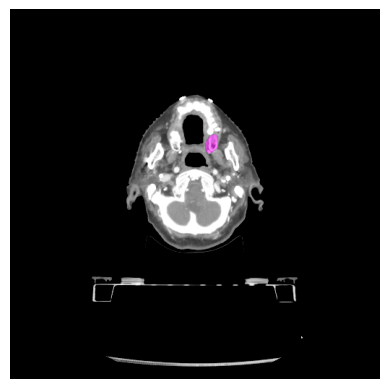

In [14]:
import SimpleITK as sitk
import plotly.express as px
from readii.image_processing import flattenImage

patients = [#"RADCURE-1276_0917",
            # "RADCURE-1550_1112",
            # "RADCURE-1544_1107",
            "RADCURE-2055_1525"
            ]

medsam_metadata = pd.read_csv("data/procdata/TCIA_RADCURE/metadata/RADCURE_GTVp_oral_cavity_medsam_input_apptainer.csv", dtype=str)


for patient in patients:
    gt_image = medsam_metadata[medsam_metadata['ID'] == patient]["image_path"]
    gt_image_path = "data/procdata/TCIA_RADCURE/" + gt_image.str.removeprefix('/hostopt/PublicDatasets/procdata/HeadNeck/TCIA_RADCURE/')
    gt_image = flattenImage(sitk.ReadImage(gt_image_path))

    gt_mask_path = medsam_metadata[medsam_metadata['ID'] == patient]["mask_path"]
    gt_mask_path = "data/procdata/TCIA_RADCURE/" + gt_mask_path.str.removeprefix('/hostopt/PublicDatasets/procdata/HeadNeck/TCIA_RADCURE/')
    gt_mask = flattenImage(sitk.ReadImage(gt_mask_path))

    pred_mask = flattenImage(sitk.ReadImage("data/results/medsam2-inference/RADCURE_GTVp_oral_cavity/masks/" + patient + ".nii.gz"))
    pred_mask.SetOrigin(gt_mask.GetOrigin())

    # print(f"Patient: {patient}")
    # print("Ground Truth:")
    # print(f"Origin: {gt_mask.GetOrigin()}")
    # print(f"Spacing: {gt_mask.GetSpacing()}")
    # print(f"Direction: {gt_mask.GetDirection()}")

    # print("Predicted:")
    # print(f"Origin: {pred_mask.GetOrigin()}")
    # print(f"Spacing: {pred_mask.GetSpacing()}")
    # print(f"Direction: {pred_mask.GetDirection()}")

    save_path = Path("data/results/medsam2-inference/RADCURE_GTVp_oral_cavity/plots")
    slice_idx = 105 #getROICenterCoords(gt_mask)[0]

    gt_image_ax, gt_mask_ax = displayCTSegOverlay(gt_image, 
                                                  gt_mask,
                                                  sliceIdx=slice_idx, 
                                                  ct_min=-200, 
                                                  ct_max=300, 
                                                  cmapSeg=plt.cm.brg, 
                                                  alpha=0.5,
                                                  savePath=save_path / f"{patient}_gt_overlay.png")
    pred_image_ax, pred_mask_ax = displayCTSegOverlay(gt_image, 
                                                      pred_mask,
                                                      sliceIdx=slice_idx, 
                                                      ct_min=-200, 
                                                      ct_max=300, 
                                                      cmapSeg=plt.cm.cool, 
                                                      alpha=0.5, 
                                                      savePath=save_path / f"{patient}_pred_overlay.png")

    

In [15]:
def getEdgeOfMask(mask):
    '''
    Computes and returns edge of a segmentation mask
    '''
    # edge has the pixels which are at the edge of the mask
    edge = np.zeros_like(mask)
    
    # mask_pixels has the pixels which are inside the mask of the automated segmentation result
    mask_pixels = np.where(mask > 0)

    for idx in range(0,mask_pixels[0].size):

        x = mask_pixels[0][idx]
        y = mask_pixels[1][idx]
        z = mask_pixels[2][idx]

        # Count # pixels in 3x3 neighborhood that are in the mask
        # If sum < 27, then (x, y, z) is on the edge of the mask
        if mask[x-1:x+2, y-1:y+2, z-1:z+2].sum() < 27:
            edge[x,y,z] = 1
            
    return edge

In [16]:
# Calculate APL divided by total path length
import SimpleITK as sitk
from readii.image_processing import flattenImage
from skimage.measure import regionprops


medsam_metadata = pd.read_csv("data/procdata/TCIA_RADCURE/metadata/RADCURE_GTVp_oral_cavity_medsam_input_apptainer.csv", dtype=str)

normalized_apl = {}

for patient in medsam_metadata['ID']:
    gt_mask_path = medsam_metadata[medsam_metadata['ID'] == patient]["mask_path"]
    gt_mask_path = "data/procdata/TCIA_RADCURE/" + gt_mask_path.str.removeprefix('/hostopt/PublicDatasets/procdata/HeadNeck/TCIA_RADCURE/')
    gt_mask = flattenImage(sitk.ReadImage(gt_mask_path))

    edge = getEdgeOfMask(sitk.GetArrayFromImage(gt_mask))

    total_path_length = edge.sum()

    apl = comparison_metrics[comparison_metrics['ID'] == patient]['Added_Path_Length'].values[0]

    normalized_apl[patient] = apl/total_path_length
    

In [33]:
pd.DataFrame.from_dict(normalized_apl, orient='index', columns=['Normalized_APL'])

,Normalized_APL
RADCURE-0014_0008,0.764571
RADCURE-0040_0030,0.720328
RADCURE-0067_0053,0.771790
RADCURE-0115_0091,0.762660
RADCURE-0137_0108,0.578939
...,...
RADCURE-3458_2790,0.775006
RADCURE-3697_3007,0.806902
RADCURE-3740_3041,0.683374
RADCURE-3746_3047,0.631029


In [32]:
pd.DataFrame.from_dict(data = {
    'SampleID': medsam_metadata['ID'],
    'Image': "/home/bhkuser/bhklab/radiomics/Projects/readii_2_roqc/data/procdata/TCIA_RADCURE/" + medsam_metadata['image_path'].str.removeprefix('/hostopt/PublicDatasets/procdata/HeadNeck/TCIA_RADCURE/'),
    'Mask': "/home/bhkuser/bhklab/radiomics/Projects/medsam2-inference/data/results/RADCURE_GTVp_oral_cavity/masks/" + medsam_metadata['ID'] + ".nii.gz",
    'DatasetName': 'RADCURE_oral_cavity',
    'SeriesInstanceUID_Image': 0,
    'Modality_Image': 'CT',
    'SeriesInstanceUID_Mask': 0,
    'Modality_Mask': 'RTSTRUCT',
    'MaskID': 'GTVp',
    'readii_Permutation': 'original',
    'readii_Region': 'full',
    'readii_Resize': 'none',
    'readii_Crop': 'none',
    'DataSource': 'TCIA'
}
).to_csv("data/procdata/TCIA_RADCURE/features/pyradiomics/pyradiomics_RADCURE_GTVp_oral_cavity_index.csv", index=False)

In [19]:
medsam_metadata

,ID,image_path,mask_path
0,RADCURE-0014_0008,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
1,RADCURE-0040_0030,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
2,RADCURE-0067_0053,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
3,RADCURE-0115_0091,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
4,RADCURE-0137_0108,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
...,...,...,...
92,RADCURE-3458_2790,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
93,RADCURE-3697_3007,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
94,RADCURE-3740_3041,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
95,RADCURE-3746_3047,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...,/hostopt/PublicDatasets/procdata/HeadNeck/TCIA...
